# 훈련 세트와 테스트 세트

이 단원에서는 지도 학습과 비지도 학습의 차이를 배우고, 모델을 훈련시키는 훈련 세트와 모델을 평가하기 위한
테스트 세트로 데이터를 나눠서 학습

## 개념정리
지도 학습(supervised learning): 훈련하기 위한 데이터와 정보를 가지고 있는 알고리즘

입력(input): 데이터

타깃(target): 정답

훈련 데이터(training data): 입력 + 타깃

비지도 학습(unsupervised learning): 타깃 없이 입력 데이터만 사용하는 알고리즘

테스트 세트(test set): 평가에 사용하는 데이터

훈련 세트(train set): 훈련에 사용되는 데이터

## 훈련셋과 테스트셋

In [1]:
# 생선 길이, 무게 데이터 입력
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 하나의 데이터로 통합
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

샘플(sample): 하나의 데이터(이 예시에서는 하나의 생선 데이터가 샘플이고, 즉 49개의 샘플 존재)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [6]:
# train 세트와 test 세트 구분
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 편향되지 않은 샘플링

샘플링 편향(sampling bias): 훈련 셋과 테스트셋에 샘플이 골고루 섞여 있지 않아 샘플링이 한쪽으로 치우친 상태

넘파이(numpy): 파이썬의 배열(array) 라이브러리

In [8]:
import numpy as np

In [9]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [12]:
print(input_arr.shape) # 배열 형태 확인 -> 49 x 2

(49, 2)


In [13]:
np.random.seed(42) # 책과 동일한 결과 위해 시드 지정
index = np.arange(49) # 0~49까지의 배열 생성
np.random.shuffle(index) # 섞어주기

In [14]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


배열 인덱싱(array indexing): 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택

In [15]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

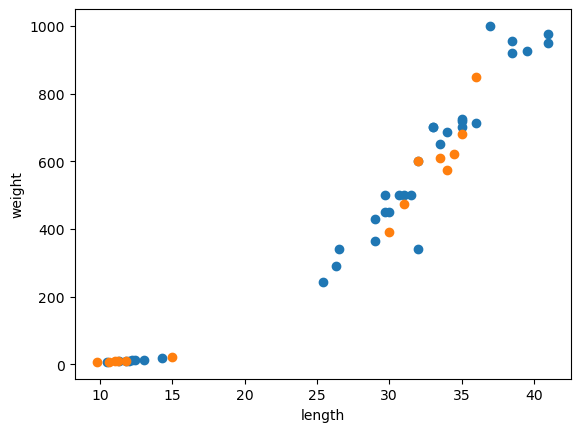

In [16]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [18]:
kn.predict(test_input) # 넘파이 배열 반환

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [19]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

## 넘파이 데이터 준비

In [1]:
# 생선 길이, 무게 데이터 입력
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [5]:
np.column_stack(([1, 2, 3], [4, 5, 6]))
# 리스트 나란히 연결하는 함수

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))

In [7]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 1 35개로 된 배열과 0 14개로 된 배열 연결(+)

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 train set과 test set 나누기

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42) # 시드 42

In [17]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [18]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [19]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify = fish_target, random_state = 42)
# stratify = 는 해당 클래스 비율에 따라 데이터 나눔

## 수상한 도미 한 마리

In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
print(kn.predict([[25, 120]]))

[0.]


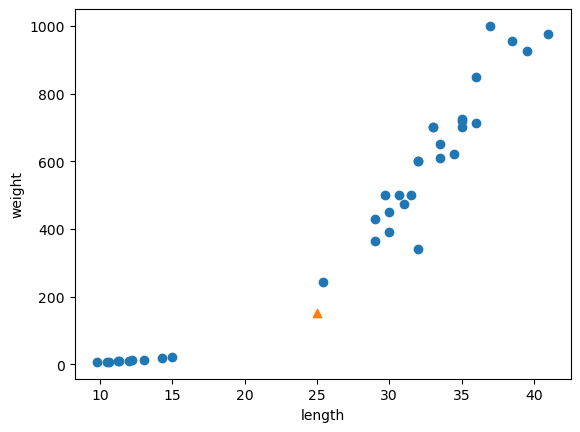

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [26]:
distances, indexes = kn.kneighbors([[25, 150]])

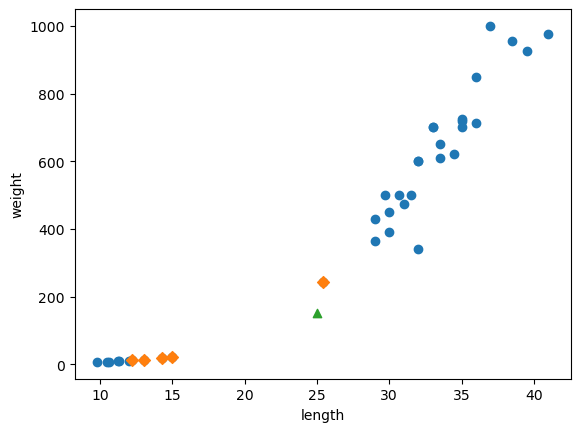

In [28]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.scatter(25, 150, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [30]:
print(train_target[indexes]) # 가까운 것중에 많은 것이 빙어이기에, 빙어로 판단

[[1. 0. 0. 0. 0.]]


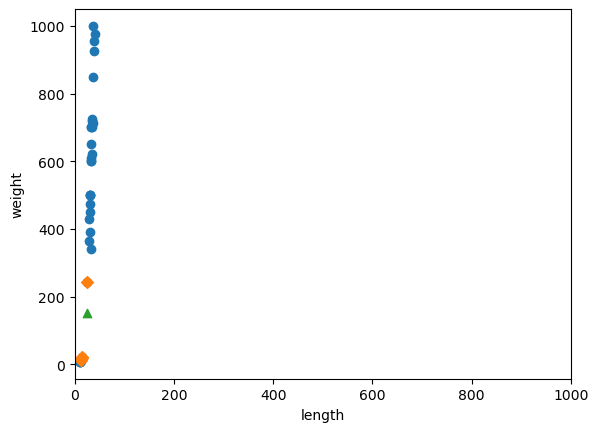

In [31]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.scatter(25, 150, marker = '^')
plt.xlim(0, 1000) # x의 범위 지정
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

위 그래프를 통해서 x값은 데이터를 결정하는 데에 큰 영향을 미치지 못한다는 것을 판단할 수 있음

스케일(scale): 각 특성의 값이 놓인 범위
    
위 그래프에선 x와 y의 스케일이 다르기 때문에 위와 같은 상황 발생

## 데이터 전처리
데이터 전처리(data preprocessing): 알고리즘을 사용하기 전에 특성값을 일정한 기준으로 맞춰 주는 과정

표준 점수(standard score, z 점수): 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는 지를 나타내는 지표

In [34]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [35]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [36]:
train_scaled = (train_input - mean) / std

브로드캐스팅(broadcasting): 넘파이 배열 사이에서 일어나는 작업

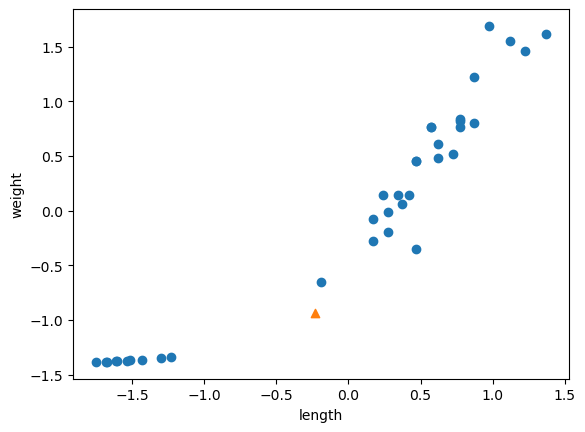

In [40]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [41]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [42]:
test_scaled = (test_input - mean) / std

In [43]:
kn.score(test_scaled, test_target)

1.0

In [45]:
print(kn.predict([new]))

[1.]


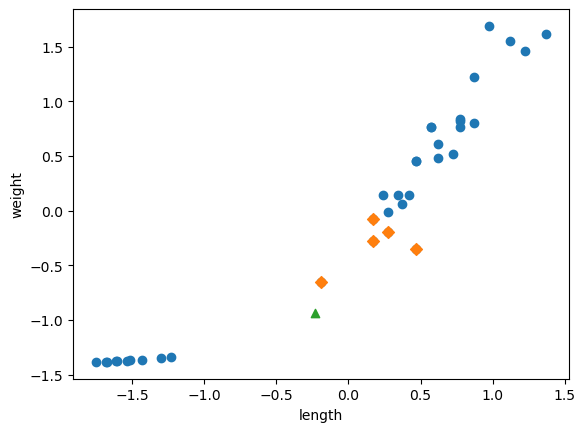

In [46]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")
plt.scatter(new[0], new[1], marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [48]:
kn.kneighbors([[25, 150]])

(array([[150.24524979, 150.25805338, 150.35871414, 150.43446443,
         150.71926768]]),
 array([[10, 35, 17,  4,  7]], dtype=int64))